# 📊Feature Selection

Important Features Identified from EDA
* Numerical Features: [policy_tenure,age_of_policyholder,population_density,displacement,gross_weight,ncap_rating,power,turning_radius,airbags,torque_value,power_value]
* Categorical Features:[area_cluster,engine_type,segment,model]
* Boolean Features:[is_brake_assist,is_power_door_locks,is_driver_seat_height_adjustable,is_speed_alert,is_ecw]

Less Important Features Based on Bivariate Analysis
* Numerical Features:[cylinder,gear_box,make,length,width,height,torque_rpm,power_rpm]
* Categorical Features:[policy_id,steering_type,transmission_type,fuel_type,rear_brakes_type]
* Boolean Features:[is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_central_locking,is_power_steering,is_day_night_rear_view_mirror]

These initial assumptions were derived through Exploratory Data Analysis (EDA), particularly using bivariate analysis techniques. However, they are subject to validation through more rigorous feature selection methods, such as statistical tests (ANOVA F-statistic), model-based approaches (e.g., feature importance from tree-based models), or dimensionality reduction techniques. 

In [1]:
# from src.feature_selection import select_features
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append(r'E:\USW\Project\car_insurance_claim_prediction\src')

import os
os.chdir(r'E:\USW\Project\car_insurance_claim_prediction\notebooks')

import importlib
import feature_selection as fs

# Reload if the module was modified
importlib.reload(fs)

<module 'feature_selection' from 'E:\\USW\\Project\\car_insurance_claim_prediction\\src\\feature_selection.py'>

## 1. 🚩Multicollinearity Check

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,...,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,torque_value,torque_rpm,power_value,power_rpm,car_volume
policy_tenure,1.000000,0.210492,0.125708,0.072295,-0.145672,0.135250,0.230258,0.234626,0.213600,-0.081701,...,0.232348,0.118843,0.279120,-0.013145,0.189236,0.210464,-0.006410,0.267434,-0.153242,0.259742
age_of_car,0.210492,1.000000,0.000066,0.101458,-0.117564,0.246802,0.435148,0.375024,0.349699,-0.123620,...,0.409377,0.163759,0.473615,-0.035594,0.354019,0.393155,-0.037802,0.480534,-0.287127,0.475491
age_of_policyholder,0.125708,0.000066,1.000000,0.045898,-0.025863,-0.016749,0.003641,-0.014463,0.018766,0.005116,...,0.033442,-0.000431,-0.001959,0.004899,-0.006011,0.013233,0.022143,0.017664,0.009555,0.012201
area_cluster,0.072295,0.101458,0.045898,1.000000,-0.336347,0.064082,0.129115,0.100640,0.110989,-0.040167,...,0.140449,0.056648,0.134212,-0.008213,0.088826,0.117364,-0.004311,0.146508,-0.077260,0.140407
population_density,-0.145672,-0.117564,-0.025863,-0.336347,1.000000,-0.064112,-0.140917,-0.132531,-0.137890,0.032041,...,-0.157082,-0.083174,-0.160015,-0.004096,-0.099831,-0.121948,-0.010293,-0.162517,0.076325,-0.153193
make,0.135250,0.246802,-0.016749,0.064082,-0.064112,1.000000,0.609524,0.263841,0.049174,-0.294633,...,0.338840,-0.200272,0.410609,-0.148005,0.880344,0.830507,-0.777807,0.640532,-0.929959,0.616728
segment,0.230258,0.435148,0.003641,0.129115,-0.140917,0.609524,1.000000,0.438755,0.355652,-0.262297,...,0.743347,-0.003220,0.619578,-0.050628,0.650443,0.869921,-0.424287,0.896325,-0.695092,0.928023
model,0.234626,0.375024,-0.014463,0.100640,-0.132531,0.263841,0.438755,1.000000,0.602395,0.216331,...,0.601066,0.551801,0.884665,0.063529,0.503410,0.365973,0.081756,0.599700,-0.299155,0.563571
fuel_type,0.213600,0.349699,0.018766,0.110989,-0.137890,0.049174,0.355652,0.602395,1.000000,-0.142738,...,0.752871,0.846739,0.741380,-0.089431,0.282911,0.251436,0.537706,0.625712,0.045372,0.434063
engine_type,-0.081701,-0.123620,0.005116,-0.040167,0.032041,-0.294633,-0.262297,0.216331,-0.142738,1.000000,...,-0.112543,0.188944,-0.130255,0.014149,-0.124902,-0.421322,0.130318,-0.322878,0.338135,-0.348742


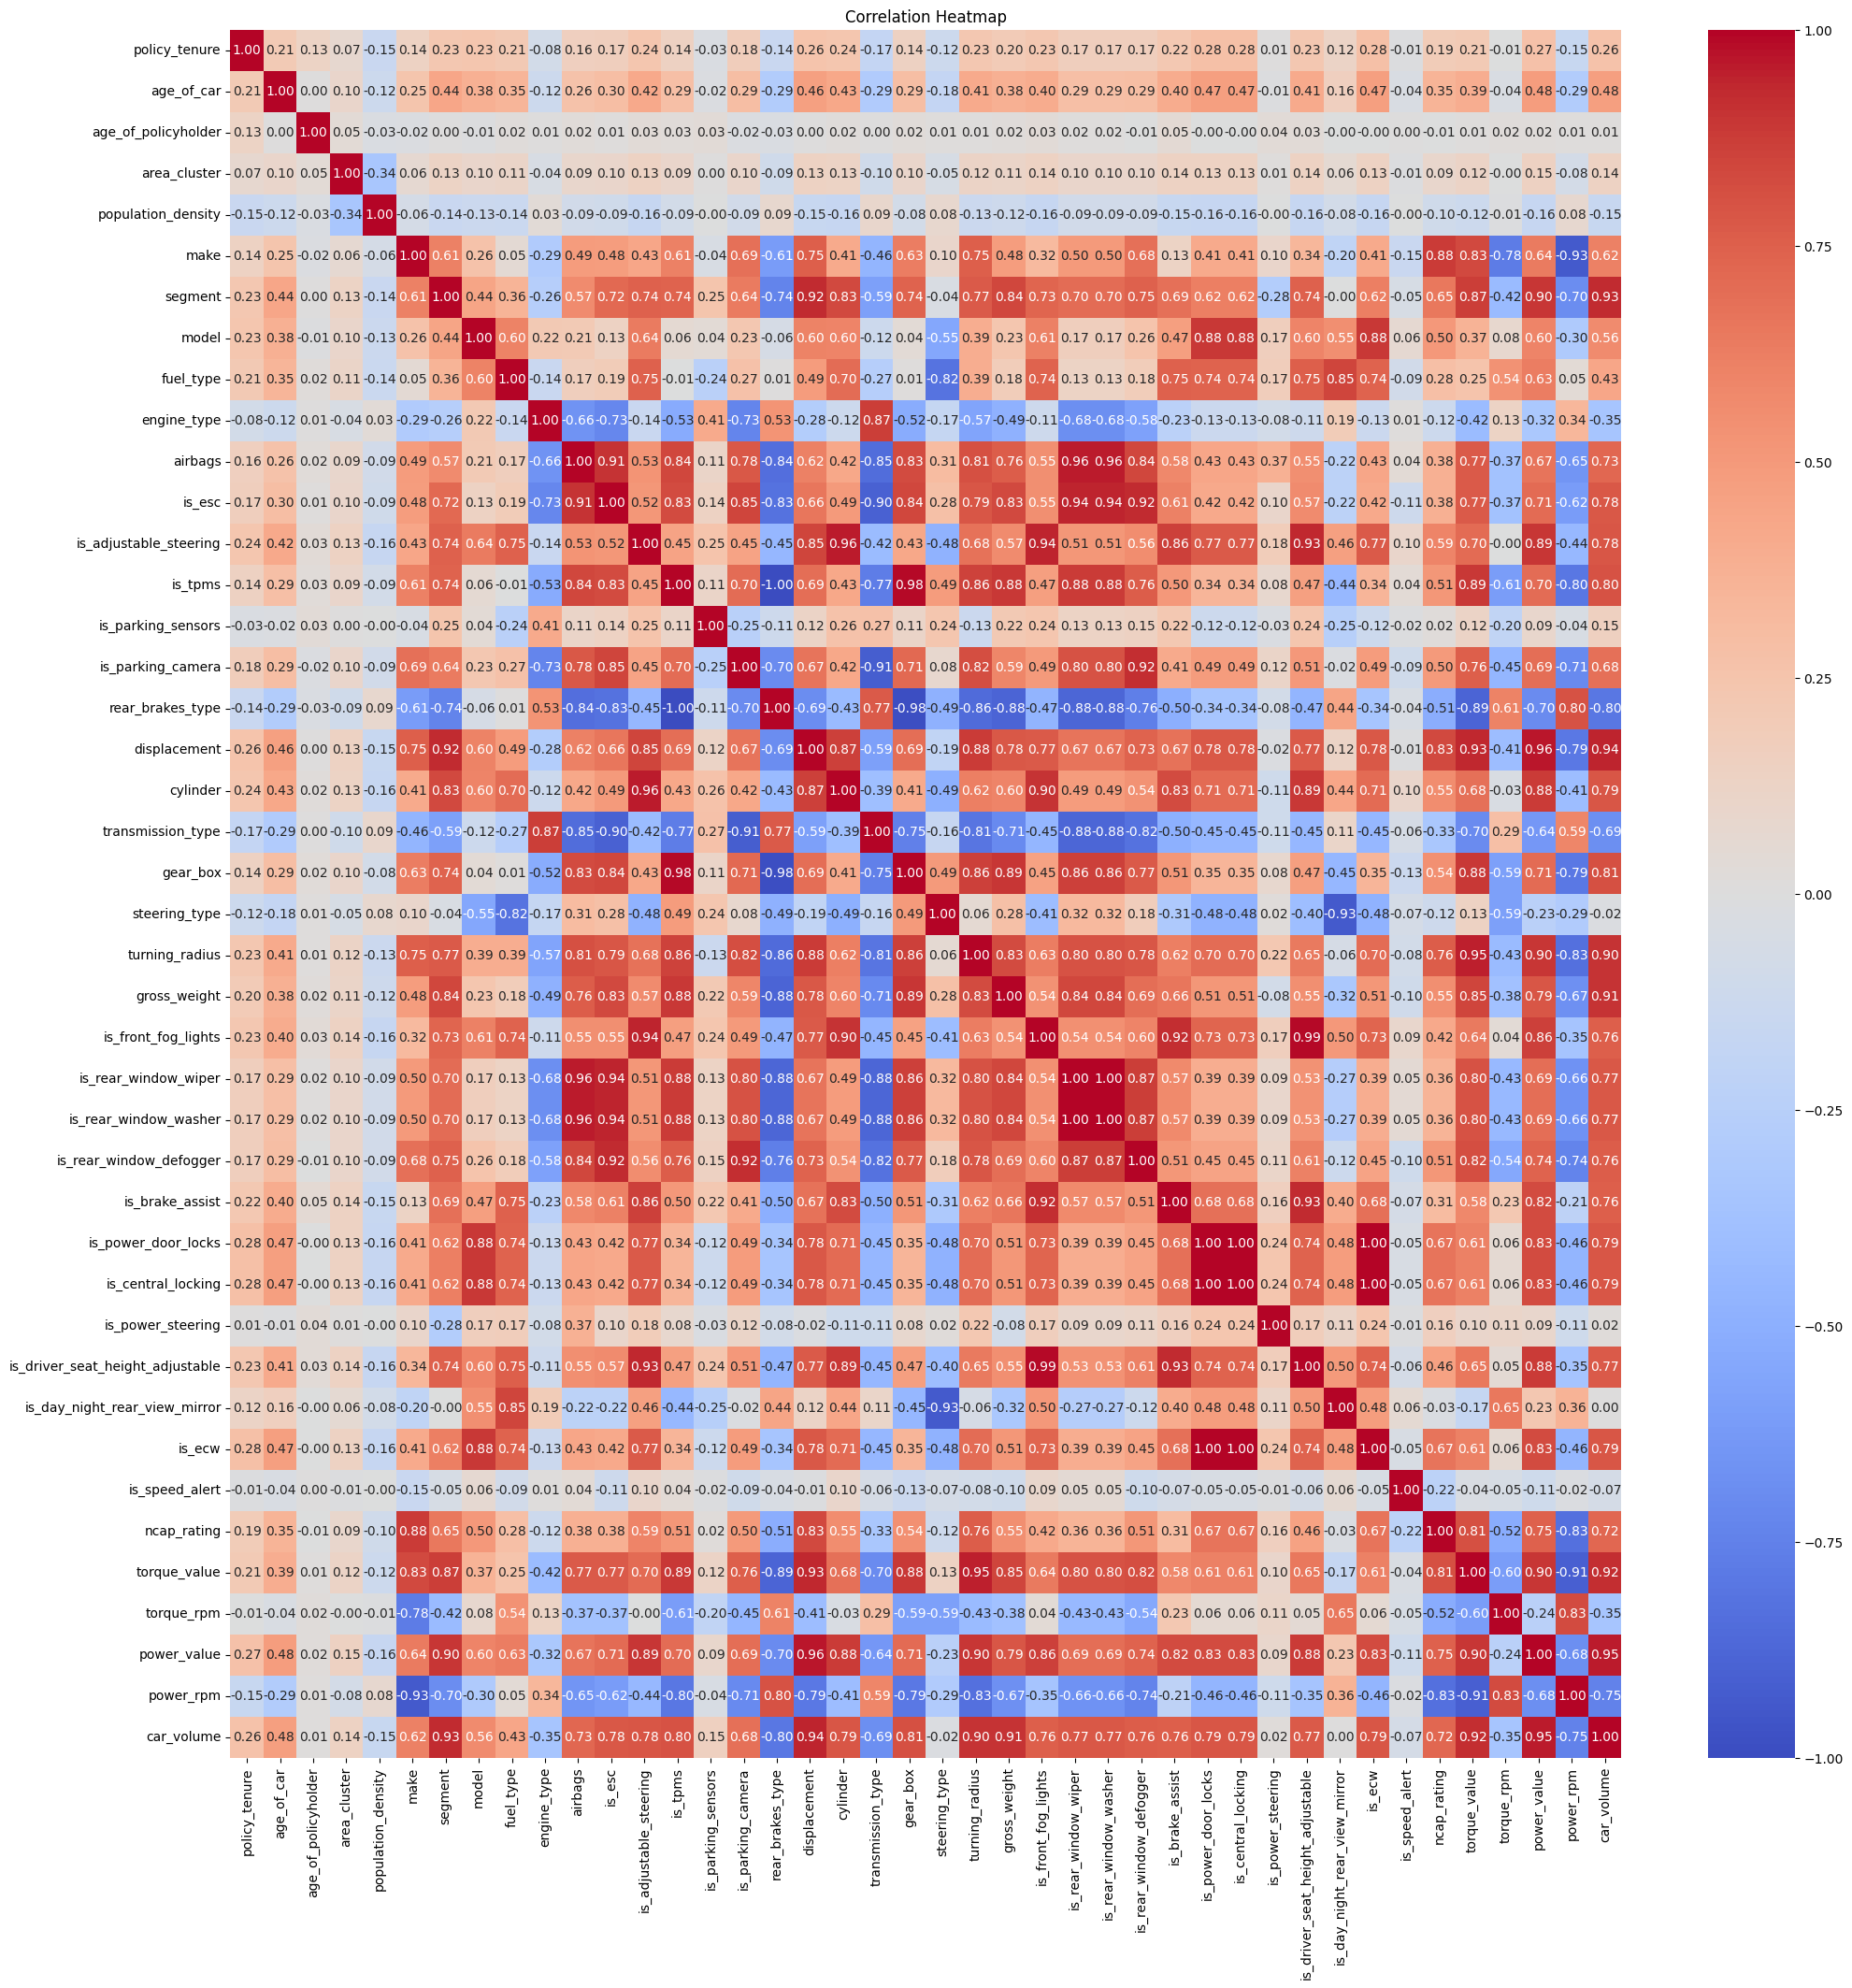

In [3]:
X, y = fs.load_data()
display(X.corr())
# Correlation Heatmap
plt.figure(figsize=(24, 24))
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

1. Engine & Performance Features : These are strongly correlated with each other.

|Feature 1	  |  Feature 2	| Correlation
|-------------|-------------|------------
displacement |  power_value|	0.96
displacement |  car_volume	|   0.94
power_value  | torque_value|	0.95
power_value  |  car_volume	|   0.95
cylinder	  | displacement|	0.85
gross_weight |	car_volume	|   0.91

*Drop or combine these; they’re all conveying similar vehicle engine size/capacity information. Keep the most predictive*

2. Make/Model/Segment Clustering : Some moderately high values here.

   
|Feature 1	  | Feature 2	|  Correlation
|-------------|-------------|------------
make	      |  model	    |  ~0.75–0.79
make	      |  segment	|  ~0.68
model	      |  segment	|  ~0.73

*model might encode both make and segment*

3. Safety Features : Many binary safety indicators are correlated.

|Feature 1	            | Feature 2	                      |  Correlation
|-----------------------|---------------------------------|------------
is_parking_camera	    |is_parking_sensors	              |     ~0.70
is_brake_assist	        |is_ecw	                          |     ~0.73
is_power_door_locks	    |is_central_locking	              |     ~0.77
is_power_steering	    |is_driver_seat_height_adjustable | 	~0.72
is_speed_alert	        |is_ecw	                          |     ~0.69

*While these don’t exceed 0.9, many of them are related and could lead to soft multicollinearity. Consider combining into composite features (e.g., total safety score) or removing redundant ones.*

4. Gear & Turning
   
|Feature 1	  | Feature 2	    |  Correlation
|-------------|-----------------|------------
gear_box	  |turning_radius   |   ~0.95

*Redundant. One can be removed unless both are independently valuable* 

**This consideration will help me in future feature selection techniques.**
- Drop: displacement, torque_value, cylinder, gear_box, gross_weight
- Keep: power_value, car_volume, turning_radius if they're most informative



## 2. 🔍 Compare Different Methods

MI selected features: ['transmission_type', 'is_front_fog_lights', 'is_day_night_rear_view_mirror', 'is_central_locking', 'is_power_steering', 'steering_type', 'is_brake_assist', 'is_speed_alert', 'is_driver_seat_height_adjustable', 'is_adjustable_steering', 'rear_brakes_type', 'is_parking_sensors', 'is_power_door_locks', 'cylinder', 'is_ecw', 'policy_tenure', 'area_cluster', 'population_density', 'age_of_car', 'age_of_policyholder']


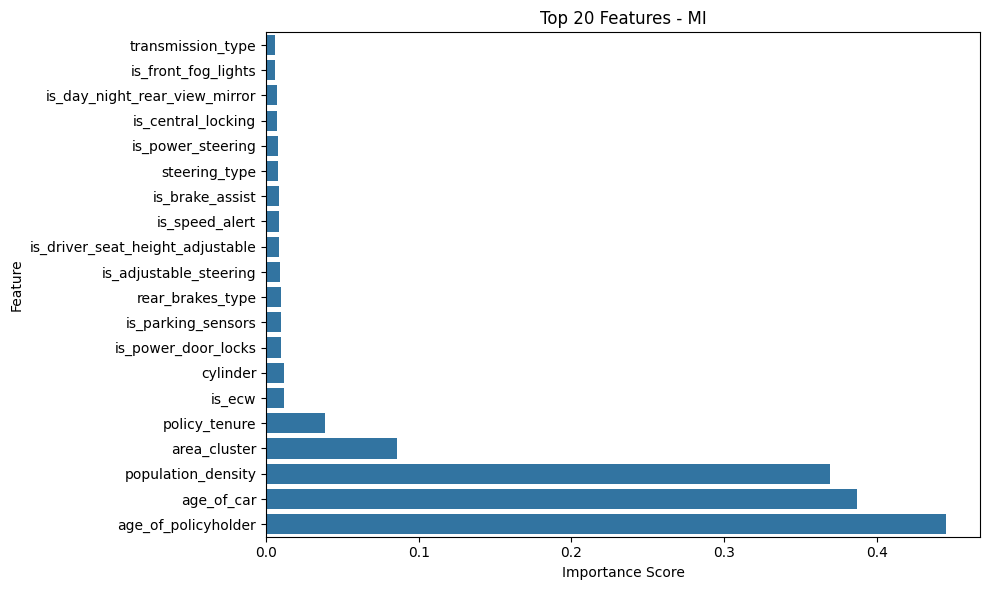

RF selected features: ['fuel_type', 'power_rpm', 'transmission_type', 'is_power_door_locks', 'ncap_rating', 'torque_rpm', 'turning_radius', 'gross_weight', 'segment', 'engine_type', 'model', 'car_volume', 'torque_value', 'power_value', 'displacement', 'area_cluster', 'age_of_policyholder', 'age_of_car', 'population_density', 'policy_tenure']


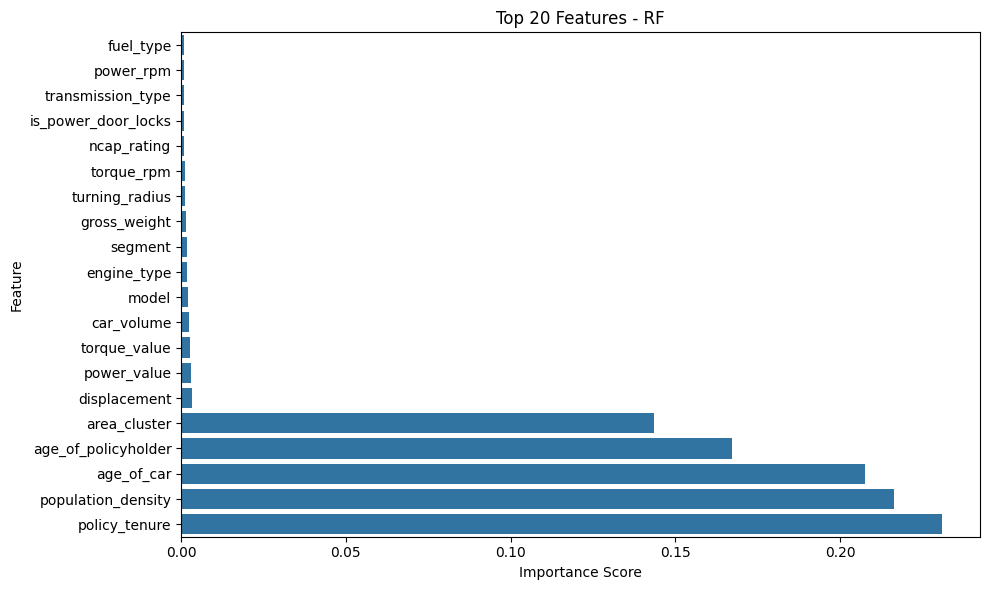

ANOVA selected features: ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster', 'segment', 'model', 'fuel_type', 'is_adjustable_steering', 'is_parking_sensors', 'displacement', 'cylinder', 'steering_type', 'is_front_fog_lights', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_driver_seat_height_adjustable', 'is_ecw', 'power_value', 'car_volume']


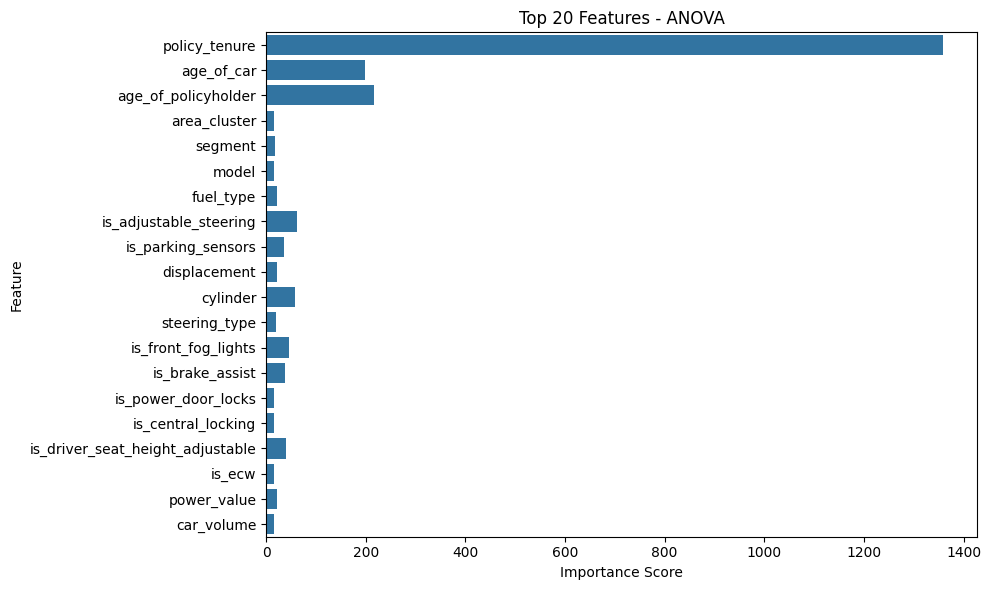

In [3]:
# Compare different methods and visualize top features
methods = ['mi', 'rf', 'anova']
feature_sets = {}

for method in methods:
    features = fs.select_features(method=method, n_features=20)
    feature_sets[method] = features
    print(f"{method.upper()} selected features:", features)
    fs.plot_feature_importance(method, X, y, n_features=20)

## 3. 🔬Evaluate Feature Sets

       precision    recall        f1   roc_auc
mi      0.951446  0.811429  0.875858  0.942724
rf      0.950522  0.811647  0.875596  0.942598
anova   0.878763  0.737400  0.801880  0.925349


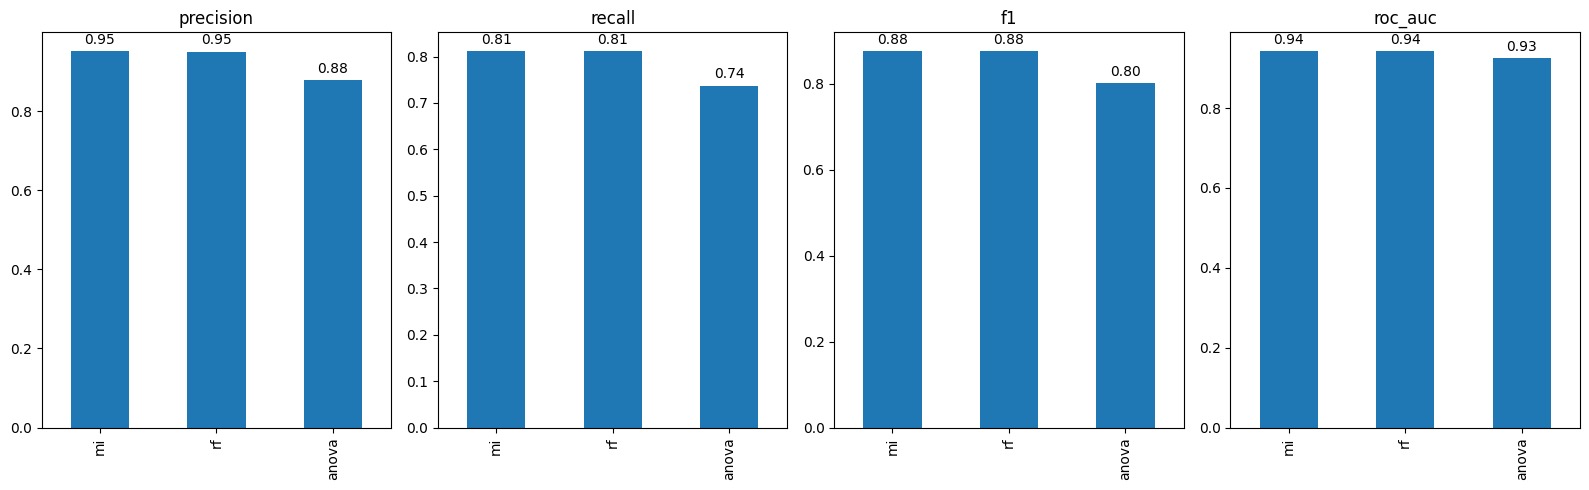

In [9]:
results = fs.evaluate_feature_sets(X, y, feature_sets)

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

metrics = ['precision', 'recall', 'f1', 'roc_auc']
fig, axes = plt.subplots(1, 4, figsize=(16, 5))  # 1 row, 4 columns

for i, metric in enumerate(metrics):
    ax = axes[i]
    bars = results_df[metric].plot(kind='bar', ax=ax, title=metric)
    ax.set_title(metric)
    
    # Annotate each bar with its value
    for bar in bars.containers[0]:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 4. ✅ Save Selected Features.

In [ ]:
results_df = results_df.sort_values(by='roc_auc', ascending=False)

# Get the best method name (e.g., 'mi', 'rf', 'anova')
best_method = results_df.index[0]
print(f"Best method based on F1 score: {best_method}")

# Get the best feature list
best_features = feature_sets[best_method]

# Save to CSV
feature_df = pd.DataFrame(best_features, columns=["feature"])
feature_df.to_csv(f'../outputs/{best_method}_features.csv', index=False)

print()

Best method based on F1 score: mi



From Evaluation
- High precision and recall: The model is making accurate and consistent predictions.
- F1 scores around 0.87 for mi and rf: This indicates excellent balance between precision and recall.
- ROC AUC > 0.94 for both mi and rf: Suggests strong discriminative power.
- ANOVA is a bit lower, but still strong (F1: 0.80, ROC AUC: 0.92).

Mutual Information (mi) and Random Forest (rf) are top performers here. Mutual Information (MI) is the best overall choice here due to slightly better than Random Forest.

MI selected features: ['transmission_type', 'is_front_fog_lights', 'is_day_night_rear_view_mirror', 'is_central_locking', 'is_power_steering', 'steering_type', 'is_brake_assist', 'is_speed_alert', 'is_driver_seat_height_adjustable', 'is_adjustable_steering', 'rear_brakes_type', 'is_parking_sensors', 'is_power_door_locks', 'cylinder', 'is_ecw', 'policy_tenure', 'area_cluster', 'population_density', 'age_of_car', 'age_of_policyholder']
